In [1]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
#instalar librerias
%pip install openpyxl

StatementMeta(, b76c1923-95ca-40ab-ad6e-9bbf66548da2, 8, Finished, Available, Finished)


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd

# Definir la ruta al archivo Excel
file_path = '/lakehouse/default/Files/BD_lugar_reseñas.xlsx'

# Leer el archivo Excel
df_lugar = pd.read_excel(file_path, engine='openpyxl', sheet_name='Detalles del Lugar')

# Mostrar las primeras filas
df_lugar.head()

StatementMeta(, b76c1923-95ca-40ab-ad6e-9bbf66548da2, 10, Finished, Available, Finished)

,name,business_status,lat,lng,rating,user_ratings_total,vicinity,price_level,place_id,tipo
0,The Coffee,OPERATIONAL,-12.090958,-77.034961,4.7,19,"Av. Dos de Mayo 219, San Isidro",NaN,ChIJ-Ui7LADJBZERGLTFScZv2Xg,coffee_shop
1,Golden King COFFEE,OPERATIONAL,-12.082491,-77.051045,4.2,402,"Av. San Felipe 697, Jesús María",2.0,ChIJGWQWyf7IBZERSoORZCQcdk8,coffee_shop
2,Coffee Lovers,OPERATIONAL,-12.030518,-76.999921,4.1,274,"Av. José Carlos Mariátegui 2593, Lima",1.0,ChIJJ77z2_rFBZER7JvqISyk8iA,coffee_shop
3,Starbucks,OPERATIONAL,-12.091446,-77.040444,4.3,1616,"Av. Dos de Mayo 880, San Isidro",2.0,ChIJZz-ZX1nIBZERs5fp0c_OnV0,coffee_shop
4,Papu café,OPERATIONAL,-12.089851,-77.023995,4.9,29,"Av. P.º de la República 2764, Lince",NaN,ChIJDypv7VzJBZERhEAcsM7e2O8,coffee_shop


In [3]:
df_lugar.info()

StatementMeta(, b76c1923-95ca-40ab-ad6e-9bbf66548da2, 11, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                580 non-null    object 
 1   business_status     580 non-null    object 
 2   lat                 580 non-null    float64
 3   lng                 580 non-null    float64
 4   rating              580 non-null    float64
 5   user_ratings_total  580 non-null    int64  
 6   vicinity            580 non-null    object 
 7   price_level         20 non-null     float64
 8   place_id            580 non-null    object 
 9   tipo                580 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 45.4+ KB


In [5]:
df_lugar.shape

StatementMeta(, b76c1923-95ca-40ab-ad6e-9bbf66548da2, 13, Finished, Available, Finished)

(580, 10)

In [11]:
#Que tipo de establecimiento tiene mejor Calificación en promedio?
# Calcular el promedio de rating por cada tipo de negocio
average_rating_by_type = df_lugar.groupby('tipo')['rating'].mean().reset_index()

# Ordenar por la calificación promedio en orden descendente (mayor a menor)
average_rating_by_type_sorted = average_rating_by_type.sort_values(by='rating', ascending=False)

# Mostrar el resultado ordenado
print(average_rating_by_type_sorted)


StatementMeta(, b76c1923-95ca-40ab-ad6e-9bbf66548da2, 19, Finished, Available, Finished)

                 tipo    rating
4                 gym  4.391667
5               hotel  4.341667
0        beauty_salon  3.986667
7              school  3.760000
9  tourist_attraction  3.758333
2         coffee_shop  3.708333
8         supermarket  3.675000
3                food  3.261667
6            pharmacy  2.825000
1      clothing_store  1.332500


In [26]:
#Que tipo de establecimiento tiene mejor Calificación en promedio?
# Calcular el promedio de rating por cada tipo de negocio
average_rating_by_name = df_lugar[df_lugar['tipo']=='gym'].groupby([ 'name','user_ratings_total'])['rating'].mean().reset_index()

# Ordenar por la calificación promedio en orden descendente (mayor a menor)
average_rating_by_name_sorted = average_rating_by_name.sort_values(by='rating', ascending=False)

# Mostrar el resultado ordenado
average_rating_by_name_sorted

StatementMeta(, b76c1923-95ca-40ab-ad6e-9bbf66548da2, 34, Finished, Available, Finished)

,name,user_ratings_total,rating
49,TRIM Gym Boutique,187,5.0
37,OPTIMUS FITNESS GYM,15,4.9
44,Reto Xtremo Gym,159,4.8
34,Muscle Fitness Gym,24,4.7
25,Levelh Gym,55,4.7
10,Chevy GYM,75,4.7
54,Trainers,245,4.6
47,Sport Fitness Gym Avila,32,4.6
59,Zonefit Gym,37,4.6
5,Aquiles Gym,76,4.6


In [27]:
import numpy as np

# Calcular C
C = average_rating_by_name_sorted['rating'].mean()

# Calcular m (por ejemplo, percentil 75)
m = average_rating_by_name_sorted['user_ratings_total'].quantile(0.75)

StatementMeta(, b76c1923-95ca-40ab-ad6e-9bbf66548da2, 35, Finished, Available, Finished)

In [29]:
def calcular_calificacion_ponderada(row, m, C):
    v = row['user_ratings_total']
    R = row['rating']
    return (v / (v + m) * R) + (m / (v + m) * C)

average_rating_by_name_sorted['calificacion_ponderada'] = average_rating_by_name_sorted.apply(calcular_calificacion_ponderada, axis=1, args=(m, C))

StatementMeta(, b76c1923-95ca-40ab-ad6e-9bbf66548da2, 37, Finished, Available, Finished)

In [40]:
# Ordenar por calificación ponderada
df_ordenado = average_rating_by_name_sorted.sort_values(by='calificacion_ponderada', ascending=False)

# Mostrar los primeros establecimientos
top10_establecimientos = df_ordenado[['name', 'user_ratings_total', 'rating', 'calificacion_ponderada']].head(10)
top10_establecimientos

StatementMeta(, b76c1923-95ca-40ab-ad6e-9bbf66548da2, 48, Finished, Available, Finished)

,name,user_ratings_total,rating,calificacion_ponderada
49,TRIM Gym Boutique,187,5.0,4.754243
44,Reto Xtremo Gym,159,4.8,4.618876
54,Trainers,245,4.6,4.528968
10,Chevy GYM,75,4.7,4.506289
25,Levelh Gym,55,4.7,4.484972
5,Aquiles Gym,76,4.6,4.469760
37,OPTIMUS FITNESS GYM,15,4.9,4.445459
6,Athletic Fitness Gym,120,4.5,4.444352
34,Muscle Fitness Gym,24,4.7,4.440755
59,Zonefit Gym,37,4.6,4.438740


StatementMeta(, b76c1923-95ca-40ab-ad6e-9bbf66548da2, 50, Finished, Available, Finished)

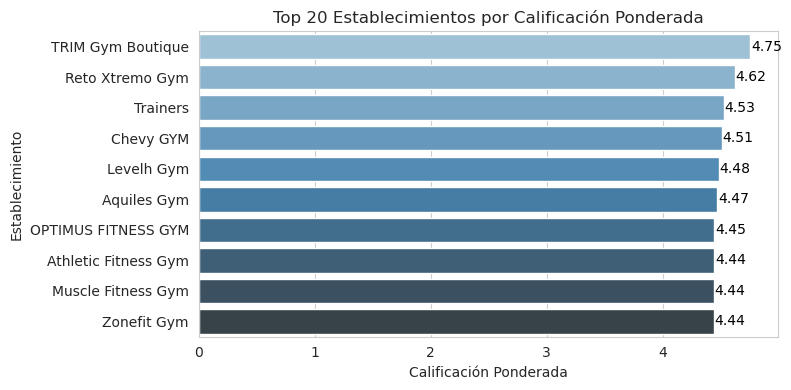

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# Configurar el estilo de Seaborn
sns.set_style('whitegrid')

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='calificacion_ponderada', y='name', data=top10_establecimientos, palette='Blues_d')

# Agregar etiquetas y título
plt.xlabel('Calificación Ponderada')
plt.ylabel('Establecimiento')
plt.title('Top 20 Establecimientos por Calificación Ponderada')

# Agregar etiquetas de valor al final de cada barra
for i, v in enumerate(top10_establecimientos['calificacion_ponderada']):
    ax.text(v + 0.005, i, f'{v:.2f}', color='black', va='center')

plt.tight_layout()
plt.show()